<a href="https://colab.research.google.com/github/tolnaidominik/GepiTanulas_AXJ0GV/blob/main/AXJ0GV_GepiTanulas_feleves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

In [188]:
df = pd.read_csv('flavors_of_cacao.csv')

df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [190]:
df.describe()

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


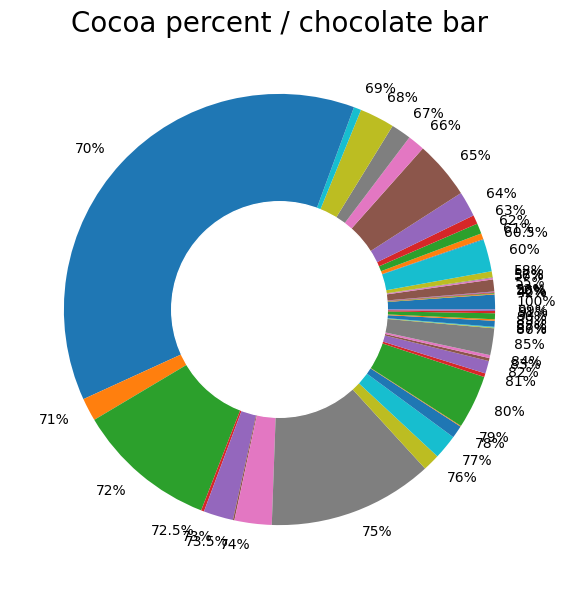

In [191]:
import matplotlib as mpl
cocoapercent = df.groupby('Cocoa\nPercent')['Rating'].count()
plt.figure(figsize=(7,7))
plt.pie(cocoapercent, labels=cocoapercent.index)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=10)
plt.title("Cocoa percent / chocolate bar", fontsize=20)
plt.show()

In [192]:
df.isnull()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1790,False,False,False,False,False,False,False,False,False
1791,False,False,False,False,False,False,False,False,False
1792,False,False,False,False,False,False,False,False,False
1793,False,False,False,False,False,False,False,False,False


In [193]:
Y = df['Rating']
Y

0       3.75
1       2.75
2       3.00
3       3.50
4       3.50
        ... 
1790    3.75
1791    3.00
1792    3.50
1793    3.25
1794    3.00
Name: Rating, Length: 1795, dtype: float64

<ipython-input-194-096fb565d486>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
<ipython-input-194-096fb565d486>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


                   REF  Review\nDate    Rating
REF           1.000000      0.985076  0.101030
Review\nDate  0.985076      1.000000  0.099846
Rating        0.101030      0.099846  1.000000


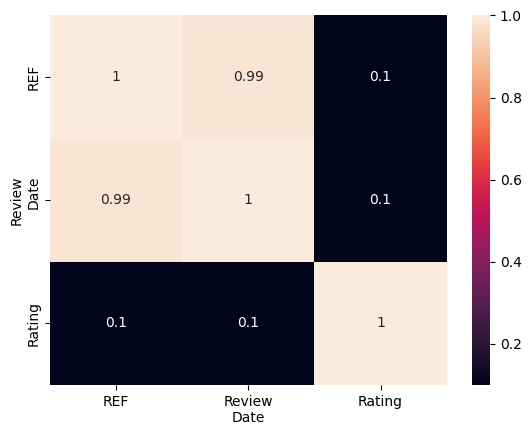

In [194]:
print(df.corr())
sns.heatmap(df.corr(), annot=True)
plt.show()

In [195]:
x = df[['Review\nDate', 'REF']]

x

,Review\nDate,REF
0,2016,1876
1,2015,1676
2,2015,1676
3,2015,1680
4,2015,1704
...,...,...
1790,2011,647
1791,2011,749
1792,2011,749
1793,2011,781


<Axes: xlabel='Rating', ylabel='count'>

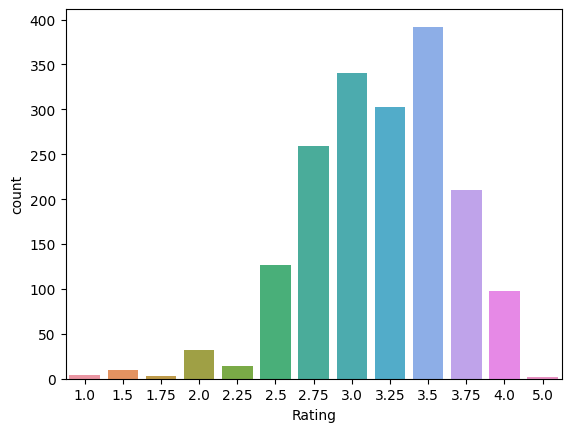

In [196]:
sns.countplot(x = df['Rating'])

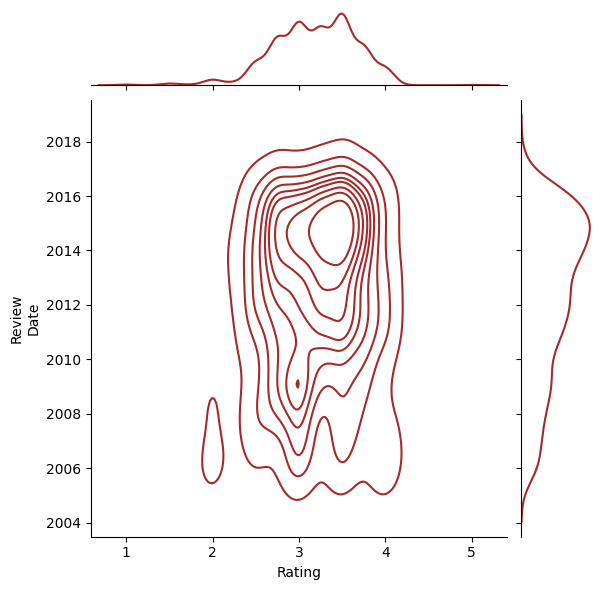

In [197]:
sns.jointplot(x = 'Rating', y= 'Review\nDate', data = df, kind='kde', color = 'brown')

In [198]:
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].str.replace('%', '')
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].str.replace('.', '')
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].astype(int)

<ipython-input-198-957416f895a6>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Cocoa\nPercent'] = df['Cocoa\nPercent'].str.replace('.', '')


<Axes: xlabel='Cocoa\nPercent', ylabel='count'>

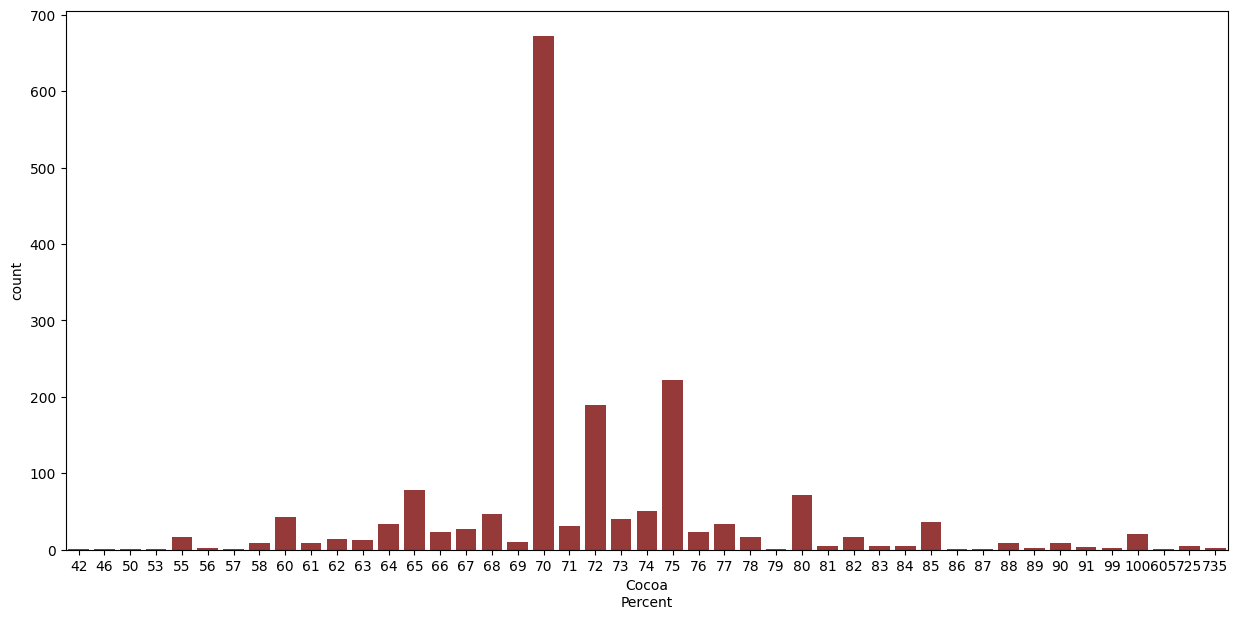

In [199]:
plt.figure(figsize=(15,7))
sns.countplot(x= 'Cocoa\nPercent', data = df, color = 'brown')

In [200]:
def normalizeIt(percent):
    if percent > 100:
        percent = int(str(percent)[:2])
    return percent

In [201]:
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].apply(normalizeIt)

<Axes: xlabel='Cocoa\nPercent', ylabel='count'>

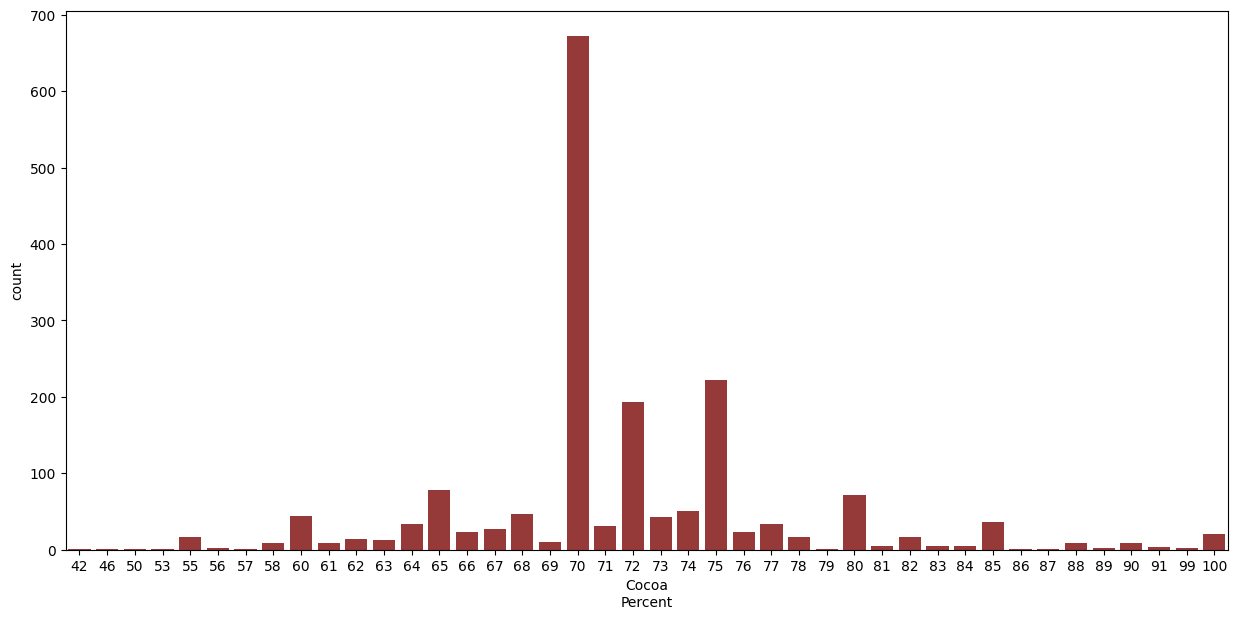

In [202]:
plt.figure(figsize=(15,7))
sns.countplot(x= 'Cocoa\nPercent', data = df, color = 'brown')

In [203]:
df['Rating'] = (df['Rating']* 100).astype(int)
df['Rating'].head(5)

0    375
1    275
2    300
3    350
4    350
Name: Rating, dtype: int64

In [204]:
company = pd.get_dummies(df['Company\xa0\n(Maker-if known)'],drop_first=True)
sbOrigin = pd.get_dummies(df['Specific Bean Origin\nor Bar Name'],drop_first=True)
companyLocation = pd.get_dummies(df['Company\nLocation'],drop_first=True)
bType = pd.get_dummies(df['Bean\nType'],drop_first=True)
bbOrigin = pd.get_dummies(df['Broad Bean\nOrigin'],drop_first=True)

In [205]:
df = pd.concat([df, company, sbOrigin, companyLocation, bType, bbOrigin], axis = 1)

In [206]:
df.drop(['Company\xa0\n(Maker-if known)', 'Specific Bean Origin\nor Bar Name','Company\nLocation', 'Bean\nType', 
         'Broad Bean\nOrigin'], axis = 1, inplace = True )

In [207]:
df = df.loc[:,~df.columns.duplicated()]

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X = df.drop('Rating', axis = 1) #Features
y = df['Rating']   # Target Variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [210]:
from sklearn.ensemble import RandomForestClassifier

In [211]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [212]:
rfc_pred = rfc.predict(X_test)

In [213]:
from sklearn.metrics import classification_report, accuracy_score

In [214]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         100       0.00      0.00      0.00         2
         150       0.00      0.00      0.00         3
         175       0.00      0.00      0.00         1
         200       0.17      0.14      0.15         7
         225       0.00      0.00      0.00         1
         250       0.33      0.10      0.15        41
         275       0.23      0.25      0.24        68
         300       0.30      0.33      0.32        99
         325       0.25      0.30      0.28       100
         350       0.30      0.40      0.34       129
         375       0.09      0.05      0.06        61
         400       0.18      0.07      0.11        27

    accuracy                           0.26       539
   macro avg       0.15      0.14      0.14       539
weighted avg       0.25      0.26      0.25       539



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [215]:
print(accuracy_score(y_test,rfc_pred)*100)

26.159554730983302


In [216]:
def rating_to_stars(rating):
    
    rating = int(rating)
    
    if (rating == 0.0 ):
        return 0.0
    elif (rating > 0 ) and (rating <= 199 ):
        return 1.0
    elif (rating >= 200 ) and (rating <= 299 ):
        return 2.0
    elif (rating >= 300 ) and (rating <= 399 ):
        return 3.0
    else:
        return 4.0

In [217]:
df['Rating'] = df['Rating'].apply(rating_to_stars)

<Axes: xlabel='Rating', ylabel='count'>

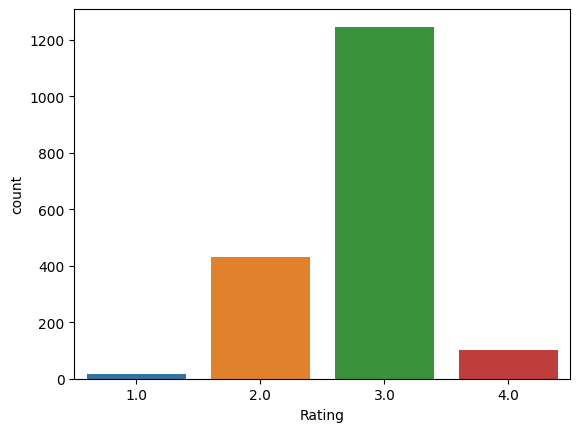

In [218]:
sns.countplot(x = 'Rating', data=df)

In [219]:
X = df.drop('Rating', axis = 1)
y = df['Rating']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [221]:
rfc = RandomForestClassifier(n_estimators=5000, min_weight_fraction_leaf= 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(min_weight_fraction_leaf=0, n_estimators=5000)

In [222]:
rfc_pred = rfc.predict(X_test)

In [223]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         6
         2.0       0.62      0.15      0.25       117
         3.0       0.75      0.97      0.84       389
         4.0       0.33      0.04      0.07        27

    accuracy                           0.74       539
   macro avg       0.42      0.29      0.29       539
weighted avg       0.69      0.74      0.67       539



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [224]:
print(accuracy_score(y_test,rfc_pred)*100)

73.65491651205936


In [225]:
#pickle.dump(rfc, open('model_trained.pkl', 'wb')) #elmentem pickle-t használva

In [226]:
from sklearn.model_selection import train_test_split    

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_dtr = model.predict(X_test)

In [227]:
print(accuracy_score(y_test,y_pred_dtr)*100)

70.68645640074212


In [228]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_dtr)
print("Mean Squared Error for DecisionTreeRegressor:", mse)

Mean Squared Error for DecisionTreeRegressor: 0.3042671614100185
